In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch_nf
import numpy as np
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import Gauss
from torch_nf.util import plot_dist
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# figure out good Gaussian posterior inference problem
D = 4
Sigma = np.eye(D,)
mu_0 = np.zeros(D,)
Sigma_0 = 2*np.eye(D)

x_mean = 1.*np.ones(D,)


N = 20

mu_n = np.dot(np.dot(Sigma_0, np.linalg.inv(Sigma_0 + Sigma/N)), x_mean) + \
       np.dot(np.dot(Sigma/N, np.linalg.inv(Sigma_0 + Sigma/N)), mu_0)
Sigma_n = np.dot(np.dot(Sigma_0, np.linalg.inv(Sigma_0 + Sigma/N)), Sigma/N)
print('N=%d: mu=' % N, mu_n)
print(Sigma_n)

N=20: mu= [0.97560976 0.97560976 0.97560976 0.97560976]
[[0.04878049 0.         0.         0.        ]
 [0.         0.04878049 0.         0.        ]
 [0.         0.         0.04878049 0.        ]
 [0.         0.         0.         0.04878049]]


### Run SNPE

In [5]:
from torch_nf.lfi import train_SNPE
# Define system
D = 4
N = 20
gauss = Gauss(D, N)

# Opt params
M = 1000
num_iters = 1000
R = 4

# data for posterior
x0 = 1.*np.ones((1, D))

# two-network arch
arch_type = 'coupling'
hidden_layers = [100]

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

nf = NormFlow(D, arch_type, True, num_stages=1, num_layers=2, num_units=15)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

Sequential(
  (linear1): Linear(in_features=4, out_features=100, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=100, out_features=1268, bias=True)
)


In [6]:
losses = train_SNPE(cnf, gauss, x0, M=M, R=R, num_iters=num_iters)

tensor([ 0.0184, -0.0661,  0.0232,  0.0918]) tensor([2.0581, 1.9870, 1.9763, 1.9483])
z mean, var
w tensor(0.0010) tensor(0.0010)
r 1 i 1
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1, it 1, loss=2.78E-02
r 1 i 2
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 3
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15

r 1 i 24
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 25
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 26
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 

r 1 i 50
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 51
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 52
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 

r 1 i 73
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 74
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 75
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 

r 1 i 97
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 98
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 99
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 

r 1 i 121
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 122
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
r 1 i 123
torch.Size([1000, 4]) torch.Size([1000, 4])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 15]) torch.Size([1000, 1, 15])
torch.Size([1000, 1, 2]) torch.Size([1000, 1, 2])
torch.Size([1000, 

KeyboardInterrupt: 

In [5]:
losses = np.array(losses)

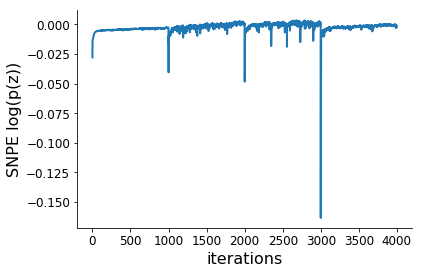

In [6]:
plt.figure()
plt.plot(-losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.show()

In [7]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

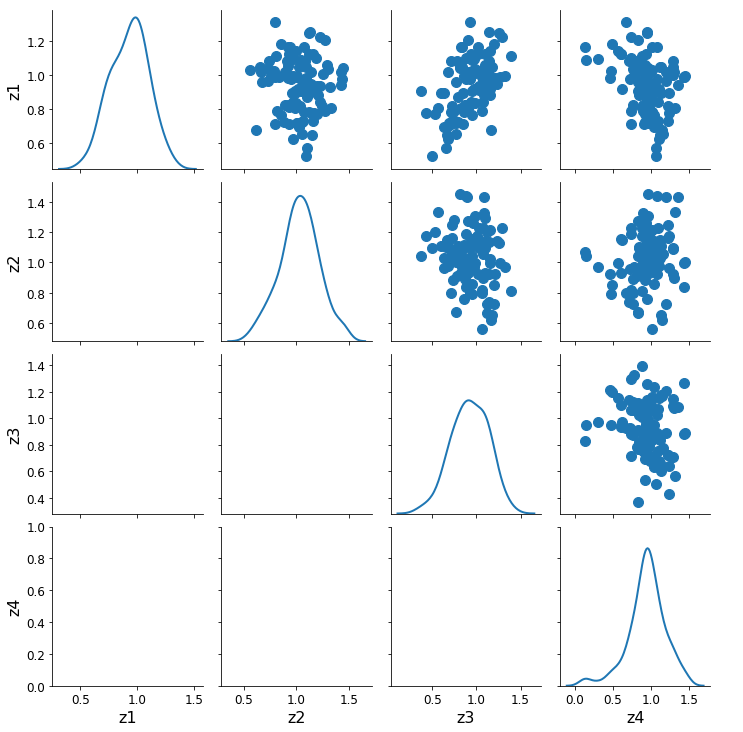

In [9]:
plt.figure()
plot_dist(z.detach().numpy()[0], log_prob.detach().numpy()[0])
plt.show()